<a href="https://colab.research.google.com/github/Cindy202411/5m-data-1.1-intro-data-science/blob/main/5m_data_3_11_Generative_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Generative AI

Generative AI refers to a subset of artificial intelligence technologies that can generate new content. This content can range from images and music to text and videos, and it is typically reflective of the data that the AI model has been trained on. These models can capture and replicate the complex distributions of real-world data, enabling them to produce novel creations that are often indistinguishable from human-generated content.

## Definition and Overview of Generative AI

Generative AI encompasses machine learning models and techniques that learn to generate data that is similar to a given dataset. The core idea is to model the underlying probability distribution of the data in order to sample new data points from that distribution. Generative models can be unsupervised, where they learn to represent and generate data from unlabeled datasets, or semi-supervised, where they utilize both labeled and unlabeled data to improve learning efficiency and accuracy.

> We have already learnt of one implementation of Generative AI in the previous unit- GPT/GPT-2 for text generation.

## Difference Between Generative and Discriminative Models

The fundamental difference between generative and discriminative models lies in what they aim to accomplish:

- **Discriminative Models**: These models learn the boundary between classes in a dataset. They are trained to discriminate between different kinds of data, making them ideal for classification tasks. A discriminative model learns a function that maps input data to output labels and is primarily concerned with the conditional probability P(Y|X), where Y is the label and X is the input data.

- **Generative Models**: In contrast, generative models are trained to generate new data instances. They learn the joint probability distribution P(X, Y) and can be used to generate new instances of X that are likely to be from the same distribution as the training data. Generative models can also be used for classification by comparing the likelihood of the input data under different class models.

## Generative Modeling Techniques

1. **Generative Adversarial Networks (GANs)**:
   - GANs consist of two neural networks, the generator and the discriminator, that are trained simultaneously through adversarial training. The generator creates data that is intended to come from the same distribution as the training set, while the discriminator tries to distinguish between real and generated data.

2. **Variational Autoencoders (VAEs)**:
   - VAEs are probabilistic graphical models that use neural networks to encode input data into a latent space and then reconstruct it from this representation. They are trained to maximize the likelihood of the data while regularizing the latent representation, often resulting in smooth latent spaces useful for generating new data points.

3. **Autoregressive Models**:
   - These models predict the next data point in a sequence by conditioning on the previous data points, effectively learning the joint probability distribution of the sequence. Examples include PixelRNN and PixelCNN for images, and models like GPT for text.

4. **Diffusion Models**:
   - Diffusion models are a class of generative models that learn to generate data by reversing a diffusion process. They start with a data point from the target distribution and gradually add noise to it until it reaches a known distribution (usually Gaussian), then learn to reverse this process.

## Applications of Generative AI

Generative AI has a wide array of applications across different fields:

- **Image Generation**: Generative models can create new images that resemble a given dataset. This has applications in art, design, and entertainment, where models can produce original artworks, design patterns, or game assets.

- **Text Generation**: These models can write coherent pieces of text, including stories, poems, news articles, and code. This is useful for content creation, chatbots, and even aiding programmers by generating code snippets.

- **Music Composition**: Generative AI can compose new pieces of music in various styles, which can be used for background scores, aiding musicians, or creating new music albums.

- **Drug Discovery**: In the pharmaceutical industry, generative models can propose new molecular structures that could lead to effective drugs, thus speeding up the drug discovery process.

- **Data Augmentation**: Generative models can augment existing datasets by creating additional, synthetic data points, which is particularly useful when training data is scarce.

- **Deepfakes**: These models can generate realistic video and audio recordings, leading to applications such as realistic avatars for virtual reality, but also raising ethical concerns due to potential misuse.

In [ ]:
!pip install diffusers[training] accelerate langchain bitsandbytes

# Generative Adversarial Network (GAN)

Generative Adversarial Networks (GANs) are a class of machine learning frameworks designed by Ian Goodfellow and his colleagues in 2014. GANs consist of two neural networks, the generator and the discriminator, which are trained simultaneously through adversarial training.

## Theoretical Foundations of GANs

![gan](https://sthalles.github.io/assets/dcgan/GANs.png)

The training process of a Generative Adversarial Network (GAN) involves two competing neural networks: a generator (G) and a discriminator (D). The generator creates samples that are intended to come from the same distribution as the training data, while the discriminator evaluates samples to determine whether they are real (from the training data) or fake (from the generator).

- **Generator (G)**: A network that learns to generate new data that follows the same distribution as the training set.
- **Discriminator (D)**: A network that learns to distinguish between real data from the training set and fake data produced by the generator.

The loss functions for GANs reflect the adversarial nature of the training process:

- **Discriminator Loss**: The discriminator's loss consists of two parts: one for correctly classifying real data and one for correctly classifying fake data generated by the generator. The total discriminator loss is typically the sum of these two parts. A commonly used loss function for the discriminator is the binary cross-entropy loss:

$$ L_D = -\mathbb{E}_{x \sim p_{data}(x)}[\log D(x)] - \mathbb{E}_{z \sim p_z(z)}[\log(1 - D(G(z)))] $$

- **Generator Loss**: The generator's loss is based on how well it can trick the discriminator into thinking its outputs are real. The generator aims to maximize the probability of the discriminator making a mistake. This is also often implemented using the binary cross-entropy loss:

$$ L_G = -\mathbb{E}_{z \sim p_z(z)}[\log D(G(z))] $$

Here, $ p_{data}(x) $ is the data distribution, and $ p_z(z) $ is the noise distribution. The generator tries to minimize this function while the discriminator tries to maximize it.

During training, the discriminator and the generator update their weights alternately. The discriminator trains to minimize $ L_D $ while keeping the generator's parameters fixed, and the generator trains to minimize $ L_G $ while keeping the discriminator's parameters fixed.

## Implementing a GAN in PyTorch

Let's implement a simple GAN in PyTorch that can generate digits similar to those in the MNIST dataset.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
# MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
# Generator
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(nz, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, z):
        return self.net(z).view(-1, 1, 28, 28)

In [ ]:
# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x.view(-1, 28*28))

In [ ]:
# Switch to GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
nz = 100  # Size of the latent vector (noise)
G = Generator(nz).to(device)
D = Discriminator().to(device)

# Optimizers
optimizer_g = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_d = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Loss function
criterion = nn.BCELoss()

In [ ]:
epochs = 20

for epoch in range(epochs):
    for i, (real_images, _) in enumerate(train_loader):
        # Train Discriminator
        D.zero_grad()
        real_images = real_images.to(device)
        real_labels = torch.ones(real_images.size(0), 1).to(device)
        fake_labels = torch.zeros(real_images.size(0), 1).to(device)
        outputs = D(real_images)
        d_loss_real = criterion(outputs, real_labels)
        d_loss_real.backward()

        z = torch.randn(real_images.size(0), nz).to(device)
        fake_images = G(z)
        outputs = D(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)
        d_loss_fake.backward()
        optimizer_d.step()

        # Train Generator
        G.zero_grad()
        outputs = D(fake_images)
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()
        optimizer_g.step()

    print(f'Epoch [{epoch+1}/{epochs}], d_loss: {d_loss_real.item()+d_loss_fake.item()}, g_loss: {g_loss.item()}')

Epoch [1/20], d_loss: 0.18710700795054436, g_loss: 3.0314698219299316
Epoch [2/20], d_loss: 0.1563216894865036, g_loss: 3.7094831466674805
Epoch [3/20], d_loss: 0.21715537458658218, g_loss: 3.405684471130371
Epoch [4/20], d_loss: 0.05245410278439522, g_loss: 3.652306079864502
Epoch [5/20], d_loss: 0.1471797078847885, g_loss: 3.3244564533233643
Epoch [6/20], d_loss: 0.5039838254451752, g_loss: 2.3643617630004883
Epoch [7/20], d_loss: 0.600212961435318, g_loss: 1.1806550025939941
Epoch [8/20], d_loss: 0.714818924665451, g_loss: 1.9133739471435547
Epoch [9/20], d_loss: 0.6358993947505951, g_loss: 1.9019098281860352
Epoch [10/20], d_loss: 0.8997035622596741, g_loss: 2.040330410003662
Epoch [11/20], d_loss: 0.8208198547363281, g_loss: 1.2302379608154297
Epoch [12/20], d_loss: 0.838317334651947, g_loss: 1.1738412380218506
Epoch [13/20], d_loss: 0.7503544390201569, g_loss: 1.6721158027648926
Epoch [14/20], d_loss: 0.8366063833236694, g_loss: 1.5351779460906982
Epoch [15/20], d_loss: 0.9806695

In [ ]:
z = torch.randn(1, nz).to(device)
fake_image = G(z).detach().cpu()

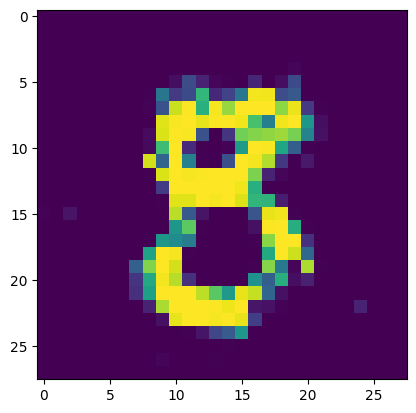

In [ ]:
plt.imshow(fake_image.view(28, 28))

# Variational Autoencoders

Variational Autoencoders (VAEs) are a type of generative model that are particularly effective for learning latent representations of data. They are used in a variety of applications such as image generation, denoising, and as a building block in more complex generative models.

## Architecture of VAEs: Encoder, Decoder, and the Latent Space

VAEs consist of two main components: an encoder and a decoder. The encoder compresses the data into a latent space, and the decoder reconstructs the data from this latent space representation.

- **Encoder**: The encoder network takes input data $ x $ and outputs two things: a mean $ \mu $ and a variance $ \sigma^2 $ (or log-variance $ \log(\sigma^2) $), which define a probability distribution in the latent space from which we can sample.

- **Decoder**: The decoder network takes a sample from the latent space and attempts to reconstruct the input data $ x $.

- **Latent Space**: The latent space is a lower-dimensional space learned by the encoder where similar data points are closer together, making it useful for generating new data points.

![vae](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/VAE_Basic.png/425px-VAE_Basic.png)

## The Reparameterization Trick

To enable backpropagation through random sampling, the reparameterization trick is used. Instead of sampling $ z $ directly from the distribution $ q(z|x) $, we sample from a standard normal distribution and then transform the sample.

$$ z = \mu + \sigma \odot \epsilon $$

where $ \epsilon \sim \mathcal{N}(0, I) $ and $ \odot $ is the element-wise product.

## Loss Function: Reconstruction Loss and KL Divergence

The loss function for VAEs has two terms:

- **Reconstruction Loss**: This term measures how well the decoder is able to reconstruct the input data. It is often implemented as the binary cross-entropy or mean squared error between the input $ x $ and the reconstruction $ \hat{x} $.

- **KL Divergence**: This term acts as a regularizer, ensuring that the learned distribution $ q(z|x) $ is similar to the prior distribution $ p(z) $, which is typically assumed to be a standard normal distribution $ \mathcal{N}(0, I) $.

The loss function can be written as:

$$ \mathcal{L}(\theta, \phi; x) = -\mathbb{E}_{q_\phi(z|x)}[\log p_\theta(x|z)] + KL(q_\phi(z|x) || p(z)) $$

where $ \theta $ and $ \phi $ are the parameters of the decoder and encoder, respectively.

# Diffusion Models

Diffusion models are a class of generative models that generate data by reversing a diffusion process. This process gradually adds noise to the data until it reaches a simple, tractable distribution (typically Gaussian). The generative model learns to reverse this process, starting from noise and gradually constructing a sample from the target data distribution.

## The Diffusion and Reverse Diffusion Process

The diffusion process can be thought of as a Markov chain that transforms data into noise through a series of small Gaussian noise additions. Mathematically, the forward diffusion process at time step $ t $ can be represented as:

$$ q(x_t | x_{t-1}) = \mathcal{N}(x_t; \sqrt{1-\beta_t} x_{t-1}, \beta_t I) $$

where $ \beta_t $ is the variance of the noise added at step $ t $, and $ I $ is the identity matrix.

The reverse diffusion process aims to learn the reverse Markov chain:

$$ p_\theta(x_{t-1} | x_t) $$

where $ p_\theta $ is the distribution parameterized by the model with parameters $ \theta $, which generates data by reversing the diffusion process.

![diffusion](https://theaisummer.com/static/ecb7a31540b18a8cbd18eedb446b468e/ee604/diffusion-models.png)

## Training Diffusion Models and the Score Matching Objective

Training diffusion models involves learning to reverse the diffusion process. One approach to training these models is through denoising score matching, where the model is trained to predict the score (the gradient of the log probability density) of the data with respect to the added noise.

The objective for denoising score matching can be written as:

$$ \mathcal{L}(\theta) = \mathbb{E}_{x_0, \epsilon \sim \mathcal{N}(0, I), t}\left[ \left\| s_\theta(x_t, t) - \nabla_{x_t} \log q(x_t | x_0) \right\|^2 \right] $$

where $ s_\theta(x_t, t) $ is the score predicted by the model for the noised data $ x_t $ at time $ t $, and $ \nabla_{x_t} \log q(x_t | x_0) $ is the true score.

## Sampling from Diffusion Models

Sampling from diffusion models involves running the learned reverse diffusion process:

1. Start with a sample $ x_T $ from the noise distribution.
2. Iteratively sample from $ p_\theta(x_{t-1} | x_t) $ for $ t = T, T-1, \ldots, 1 $ to obtain $ x_0 $, a sample from the data distribution.

This process generates new data samples by gradually denoising the initial noise sample.

## Implementing a Diffusion Model for Image Generation

Let's use a pre-trained diffusion model, such as Stable Diffusion, which can generate images from text prompts. We'll also need an appropriate tokenizer to process the text input.

In [ ]:
from diffusers import StableDiffusionPipeline
from transformers import CLIPTextModel, CLIPTokenizer

In [ ]:
# Load the pre-trained Stable Diffusion pipeline
model_id = "CompVis/stable-diffusion-v1-4"
pipeline = StableDiffusionPipeline.from_pretrained(model_id)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
# Load the tokenizer for text processing
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

In [ ]:
# Move the pipeline to the GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
pipeline = pipeline.to(device)

In [ ]:
def generate_image(pipeline, tokenizer, prompt, guidance_scale=7.5):
    # Tokenize the text prompt
    text_input = tokenizer(prompt, return_tensors="pt", padding=True).to(device)

    # Generate the image
    with torch.no_grad():
        image = pipeline(prompt, guidance_scale=guidance_scale).images[0]

    return image

In [ ]:
# Example text prompt
prompt = "A futuristic city skyline at sunset, digital art"

# Generate the image
image = generate_image(pipeline, tokenizer, prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

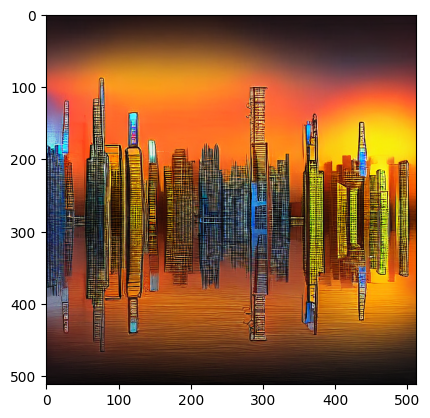

In [ ]:
# Display the image
plt.imshow(image)

# Open-Source Large Language Models (LLMs)

Large Language Models (LLMs) have transformed the field of natural language processing, offering capabilities ranging from text generation to question-answering and more. While models like GPT-3/4 (ChatGPT) by OpenAI have garnered significant attention, there are also open-source alternatives that researchers and developers can utilize. Let's explore some of the open-source LLMs available for use.

In [ ]:
import torch
from transformers import BitsAndBytesConfig
from langchain import HuggingFacePipeline
from langchain import PromptTemplate, LLMChain
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

In [ ]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.bfloat16,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
)

model_id = "mistralai/Mistral-7B-Instruct-v0.1"

model_4bit = AutoModelForCausalLM.from_pretrained(model_id, device_map="auto",
                                                  quantization_config=bnb_config)
tokenizer = AutoTokenizer.from_pretrained(model_id)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

In [ ]:
pipeline = pipeline(
        "text-generation",
        model=model_4bit,
        tokenizer=tokenizer,
        use_cache=True,
        device_map="auto",
        max_length=500,
        do_sample=True,
        top_k=5,
        num_return_sequences=1,
        eos_token_id=tokenizer.eos_token_id,
        pad_token_id=tokenizer.eos_token_id,
)

llm = HuggingFacePipeline(pipeline=pipeline)

In [ ]:
#### Prompt
template = """<s>[INST] You are a helpful, respectful and honest assistant. Answer exactly in few words from the context
Answer the question below from context below :
{context}
{question} [/INST] </s>
"""

In [ ]:
question_p = """What is the date for announcement"""
context_p = """ On August 10 said that its arm JSW Neo Energy has agreed to buy a portfolio of 1753 mega watt renewable energy generation capacity from Mytrah Energy India Pvt Ltd for Rs 10,530 crore."""
prompt = PromptTemplate(template=template, input_variables=["question","context"])
llm_chain = LLMChain(prompt=prompt, llm=llm)
response = llm_chain.run({"question":question_p,"context":context_p})
response

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


'The date for the announcement was August 10.'